# 1. Calibrators

## 1.1. Notebook setup

In [1]:
from astropy import coordinates as coord
from cmcrameri import cm as cmc
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import smplotlib

In [2]:
epochs = ["A", "B", "C", "D", "E", "F"]
data_path = "../data/"
fig_path = "../figures/"
calibrator = "J0340"
target = "HR1099"

cm = [
    "#377eb8",
    "#e41a1c",
    "#4daf4a",
    "#dede00",
    "#ff7f00",
    "#999999",
    "#984ea3",
    "#f781bf",
    "#a65628",
]
marker_cycle = ["o", "v", "X", "<", "D", "^"]

cta26 = coord.SkyCoord(ra="03h39m30.9377870s", dec="-01d46m35.804200s", frame="icrs")
j0340 = coord.SkyCoord(ra="03h40m32.5957190s", dec="-02d54m54.230610s", frame="icrs")
hr1099 = coord.SkyCoord(ra="03h36m47.256031s", dec="+00d35m13.350520s", frame="icrs")

cal_ra = r"$03^{\rm h}40^{\rm m}32\overset{{\rm s}}{.}595719$"
cal_dec = r"$-02^{\circ}54^{\prime}54\overset{\prime\prime}{.}23061$"

## 1.2. Import data

In [3]:
mean_jd = np.genfromtxt(
    data_path + target + "_I_positions.txt",
    skip_header=2,
    dtype="U1,f8,f8,f8,f8,f8,f8,f8",
    usecols=(5),
    unpack=True,
)
mean_mjd = np.round(mean_jd - 2400000.5, 1)

calibrator_results = {}
for epoch in epochs:
    x, y = np.genfromtxt(
        data_path + epoch + "_" + calibrator + "_I_sub-epoch_positions.txt",
        skip_header=2,
        dtype="U1,f8,f8,f8,f8,f8,f8,f8",
        usecols=(2, 3),
        unpack=True,
    )

    calibrator_results[epoch] = np.array([x, y])

## 1.3. Plot

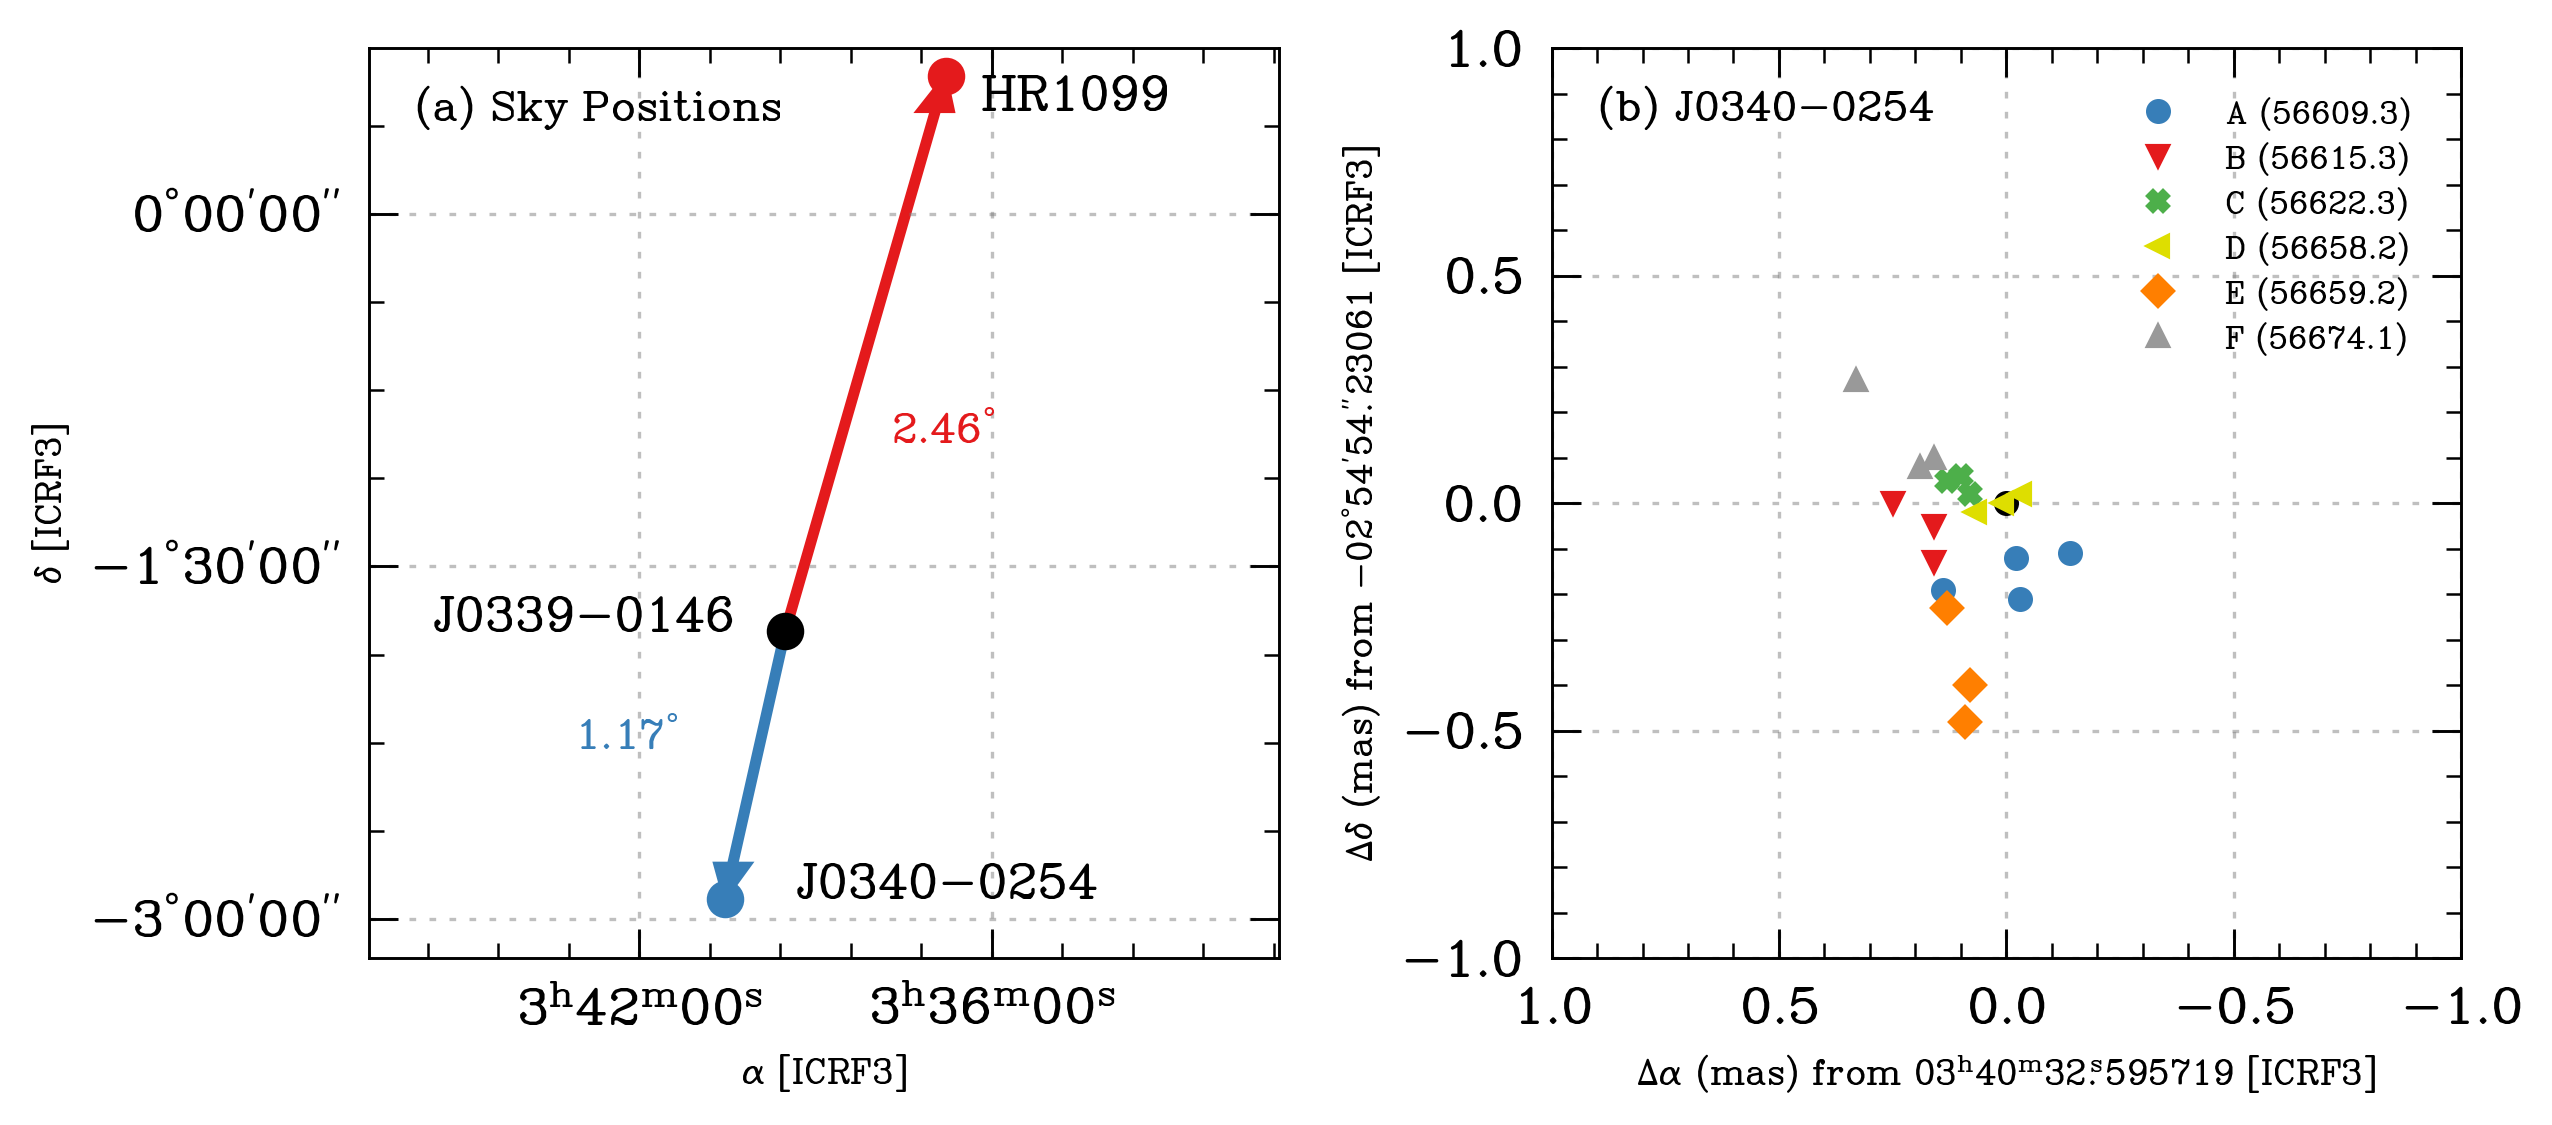

In [4]:
def ra_fmt(x, pos):
    ra = (
        coord.Angle(x, unit="deg")
        .to_string(sep=" ", precision=1)
        .replace(".", " ")
        .split()[0:3]
    )
    return r"$%s^{\rm h} %s^{\rm m} %s^{\rm s}$" % (ra[0], ra[1], ra[2])


def dec_fmt(x, pos):
    dec = (
        coord.Angle(x, unit="deg")
        .to_string(sep=" ", precision=1)
        .replace(".", " ")
        .split()[0:3]
    )
    return r"$%s^{\circ} %s^{\prime} %s^{\prime\prime}$" % (dec[0], dec[1], dec[2])


fig, ax = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(cta26.ra.hourangle, cta26.dec.deg, "o", color="black")
ax[0].annotate(
    "J0339-0146",
    xy=(cta26.ra.hourangle + 0.1, cta26.dec.deg),
    xycoords="data",
    fontsize=14,
)
ax[0].plot(j0340.ra.hourangle, j0340.dec.deg, "o", color=cm[0])
ax[0].annotate(
    "J0340-0254",
    xy=(j0340.ra.hourangle - 0.02, j0340.dec.deg),
    xycoords="data",
    fontsize=14,
)
ax[0].arrow(
    cta26.ra.hourangle,
    cta26.dec.deg,
    j0340.ra.hourangle - cta26.ra.hourangle,
    j0340.dec.deg - cta26.dec.deg,
    color=cm[0],
    width=0.002,
    head_width=0.01,
    head_length=0.15,
    length_includes_head=True,
)
ax[0].annotate(
    cta26.separation(j0340).to_string(unit="degree", precision=2, decimal=True)
    + "$^{\circ}$",
    xy=(cta26.ra.hourangle + 0.06, cta26.dec.deg - 0.5),
    xycoords="data",
    fontsize=12,
    color=cm[0],
)
ax[0].plot(hr1099.ra.hourangle, hr1099.dec.deg, "o", color=cm[1])
ax[0].annotate(
    "HR1099",
    xy=(hr1099.ra.hourangle - 0.01, hr1099.dec.deg - 0.15),
    xycoords="data",
    fontsize=14,
)
ax[0].arrow(
    cta26.ra.hourangle,
    cta26.dec.deg,
    hr1099.ra.hourangle - cta26.ra.hourangle,
    hr1099.dec.deg - cta26.dec.deg,
    color=cm[1],
    width=0.002,
    head_width=0.01,
    head_length=0.15,
    length_includes_head=True,
)
ax[0].annotate(
    cta26.separation(hr1099).to_string(unit="degree", precision=2, decimal=True)
    + "$^{\circ}$",
    xy=(cta26.ra.hourangle - 0.03, cta26.dec.deg + 0.8),
    xycoords="data",
    fontsize=12,
    color=cm[1],
)
ax[0].set_xlim((3 + 41 / 60) + 1.4 / 15, (3 + 41 / 60) - 2.47 / 15)
ax[0].set_ylim((-1 - 46 / 60) - 1.4, (-1 - 46 / 60) + 2.47)
ax[0].set_xlabel(r"$\alpha$ [ICRF3]", fontsize=10)
ax[0].set_ylabel(r"$\delta$ [ICRF3]", fontsize=10)

x_formatter = mpl.ticker.FuncFormatter(ra_fmt)
ax[0].xaxis.set_major_formatter(x_formatter)
ax[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
y_formatter = mpl.ticker.FuncFormatter(dec_fmt)
ax[0].yaxis.set_major_formatter(y_formatter)
ax[0].yaxis.set_major_locator(mpl.ticker.MultipleLocator(1.5))
ax[0].set_aspect(1 / 15)
ax[0].annotate(
    "(a) Sky Positions", xy=(0.05, 0.92), xycoords="axes fraction", fontsize=12
)
ax[0].grid(True, linestyle="dotted", alpha=0.5)

for i, epoch in enumerate(epochs):
    ax[1].errorbar(
        calibrator_results[epoch][0],
        calibrator_results[epoch][1],
        color=cm[i],
        marker=marker_cycle[i],
        markersize=5,
        linestyle="None",
        label="%s (%.1f)" % (epoch, mean_mjd[i]),
    )

ax[1].plot([0], [0], markersize=5, marker="o", color="black")
ax[1].set_xlim(1, -1)
ax[1].set_ylim(-1, 1)
ax[1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax[1].set_xlabel(r"$\Delta \alpha$ (mas) from %s [ICRF3]" % cal_ra, fontsize=10)
ax[1].set_ylabel(r"$\Delta \delta$ (mas) from %s [ICRF3]" % cal_dec, fontsize=10)
ax[1].legend(fontsize=9, loc="upper right")
ax[1].set_aspect("equal")
ax[1].annotate("(b) J0340-0254", xy=(0.05, 0.92), xycoords="axes fraction", fontsize=12)
ax[1].grid(True, linestyle="dotted", alpha=0.5)
fig.set_facecolor("white")
fig.set_dpi(300)
fig.savefig(fig_path + "calibrators.pdf", bbox_inches="tight")
plt.show()